In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from random import shuffle
from zipfile import ZipFile
from PIL import Image
from skimage.feature import hog, graycomatrix, graycoprops, local_binary_pattern
from skimage.feature import local_binary_pattern
from skimage import img_as_ubyte
from skimage.measure import shannon_entropy
from skimage.color import rgb2gray
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Input directory containing class subfolders
input_dir = "train"
output_dir = "process_image"

#  output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

class_folders = [folder for folder in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, folder))]

# Iterate through each class folder
for class_folder in class_folders:
    class_input_dir = os.path.join(input_dir, class_folder)
    class_output_dir = os.path.join(output_dir, class_folder)

    #  class output directory if it doesn't exist
    if not os.path.exists(class_output_dir):
        os.makedirs(class_output_dir)

    # List all image files in the class input directory
    image_files = os.listdir(class_input_dir)

    # Iterate through each image in the class folder
    for image_file in image_files:
        # Construct full paths for input and output images
        input_image_path = os.path.join(class_input_dir, image_file)
        output_image_path = os.path.join(class_output_dir, image_file)
        print(f"Processing image: {input_image_path}")

        # Load the image
        color_image = cv2.imread(input_image_path)

        if color_image is not None:
            # image processing operations
            gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
            enhanced_image = cv2.equalizeHist(gray_image)
            smoothed_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)
            #k-means
            k = 3
            pixel_values = color_image.reshape((-1, 3))
            pixel_values = np.float32(pixel_values)
            criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
            _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
            centers = np.uint8(centers)
            segmented_image = centers[labels.flatten()].reshape(color_image.shape)

            # Canny edge detection
            edges = cv2.Canny(segmented_image, 100, 200)

            # Saving the processed image to the class output directory
            cv2.imwrite(output_image_path,edges)
            print(f"Processed image saved to: {output_image_path}")


print("Image processing complete.")

Processing image: train\apple\Image_1.jpg
Processed image saved to: process_image\apple\Image_1.jpg
Processing image: train\apple\Image_10.jpg
Processed image saved to: process_image\apple\Image_10.jpg
Processing image: train\apple\Image_2.jpg
Processed image saved to: process_image\apple\Image_2.jpg
Processing image: train\apple\Image_3.jpg
Processed image saved to: process_image\apple\Image_3.jpg
Processing image: train\apple\Image_5.JPG
Processed image saved to: process_image\apple\Image_5.JPG
Processing image: train\apple\Image_6.jpg
Processed image saved to: process_image\apple\Image_6.jpg
Processing image: train\apple\Image_7.jpg
Processed image saved to: process_image\apple\Image_7.jpg
Processing image: train\apple\Image_9.jpg
Processed image saved to: process_image\apple\Image_9.jpg
Processing image: train\banana\Image_1.jpg
Processed image saved to: process_image\banana\Image_1.jpg
Processing image: train\banana\Image_11.png
Processed image saved to: process_image\banana\Image

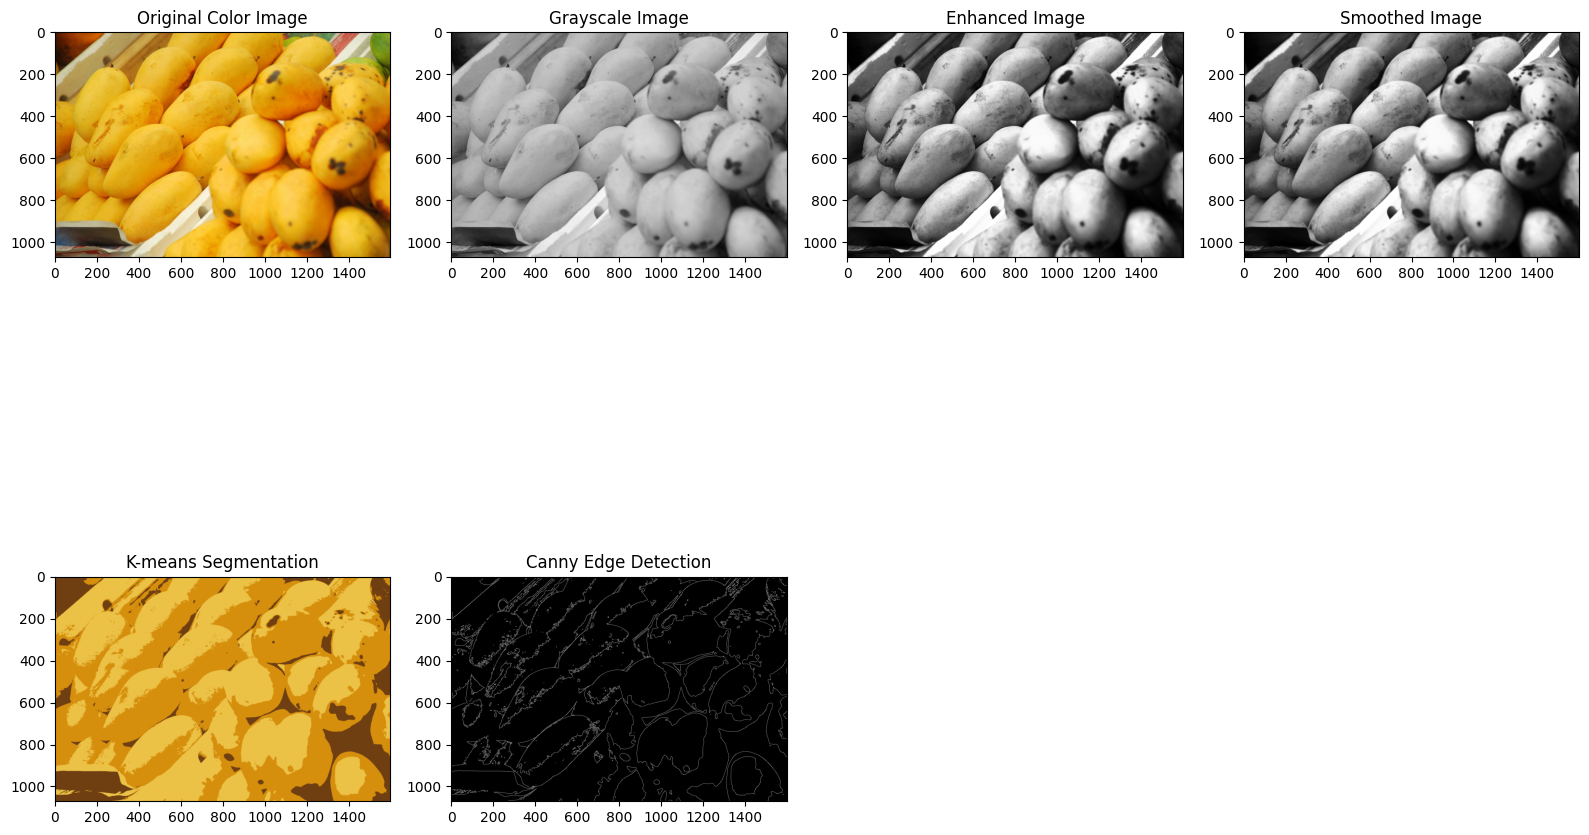

In [3]:
image_path = 'train/mango/Image_3.jpg'
# Load the image
color_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
enhanced_image = cv2.equalizeHist(gray_image)
smoothed_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

# K-means segmentation

k = 3  # Number of clusters
pixel_values = color_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(color_image.shape)

# Canny edge detection
edges = cv2.Canny(segmented_image, 100, 200)

plt.figure(figsize=(16, 12))
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')

plt.subplot(2, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(2, 4, 3)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')

plt.subplot(2, 4, 4)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')

plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('K-means Segmentation')

plt.subplot(2, 4, 6)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from skimage.feature import hog, local_binary_pattern, graycomatrix, graycoprops
from skimage.color import rgb2gray
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# paths for  train and test data
train_dir = "train"
test_dir = "test"

# function to extract HOG features
def extract_hog_features(image):

    features, _ = hog(smoothed_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    return features

#  function to extract color histogram features
def extract_color_histogram(image):
    b, g, r = cv2.split(image)
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    color_hist_features = np.concatenate((hist_b, hist_g, hist_r)).flatten()
    return color_hist_features

# function to extract LBP features
def extract_lbp_features(image):

    lbp_features = local_binary_pattern(smoothed_image, P=8, R=1, method='uniform')
    hist, _ = np.histogram(lbp_features.ravel(), bins=np.arange(0, 11), range=(0, 10))
    lbp_features = hist.astype("float")
    lbp_features /= (lbp_features.sum() + 1e-8)
    return lbp_features

# function to extract GLCM features
def extract_glcm_features(image):

    glcm = graycomatrix(smoothed_image, [1], [0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    entropy = -np.sum(glcm * np.log2(glcm + 1e-8))
    glcm_features = [contrast, energy, entropy]
    return glcm_features

# Load train data and extract features
X_train, y_train = [], []

for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            hog_features = extract_hog_features(image)
            color_hist_features = extract_color_histogram(image)
            lbp_features = extract_lbp_features(image)
            glcm_features = extract_glcm_features(image)
            combined_features = np.concatenate((hog_features,color_hist_features, lbp_features, glcm_features))
            X_train.append(combined_features)
            y_train.append(class_dir)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Load test data and extract features
X_test, y_test = [], []

for class_dir in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            hog_features = extract_hog_features(image)
            color_hist_features = extract_color_histogram(image)
            lbp_features = extract_lbp_features(image)
            glcm_features = extract_glcm_features(image)
            combined_features = np.concatenate((hog_features,color_hist_features,lbp_features, glcm_features))
            X_test.append(combined_features)
            y_test.append(class_dir)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=350, random_state=42)
clf.fit(X_train, y_train)

# Prediction on the test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the test accuracy and classification report
print("Testing Accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))



Testing Accuracy: 0.9662921348314607
              precision    recall  f1-score   support

       apple       1.00      0.70      0.82        10
      banana       1.00      1.00      1.00         9
        kiwi       0.91      1.00      0.95        10
       mango       1.00      1.00      1.00        10
      orange       1.00      1.00      1.00        10
        pear       0.91      1.00      0.95        10
   pineapple       0.91      1.00      0.95        10
 pomegranate       1.00      1.00      1.00        10
  watermelon       1.00      1.00      1.00        10

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.96        89
weighted avg       0.97      0.97      0.96        89



In [5]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0,tol=1e-5)
lsvc.fit(X_train,y_train)
# Predict on the test set
y_test_pred = lsvc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the test accuracy and classification report
print("Testing Accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))

c:\Users\Avick Sinha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Avick Sinha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Testing Accuracy: 0.5617977528089888
              precision    recall  f1-score   support

       apple       0.57      0.40      0.47        10
      banana       0.31      0.44      0.36         9
        kiwi       0.55      0.60      0.57        10
       mango       0.83      0.50      0.62        10
      orange       1.00      0.50      0.67        10
        pear       0.55      0.60      0.57        10
   pineapple       0.64      0.70      0.67        10
 pomegranate       0.80      0.40      0.53        10
  watermelon       0.45      0.90      0.60        10

    accuracy                           0.56        89
   macro avg       0.63      0.56      0.56        89
weighted avg       0.64      0.56      0.57        89



In [6]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the test accuracy and classification report
print("Testing Accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))


Testing Accuracy: 0.42696629213483145
              precision    recall  f1-score   support

       apple       0.44      0.40      0.42        10
      banana       0.26      0.78      0.39         9
        kiwi       0.57      0.40      0.47        10
       mango       0.20      0.10      0.13        10
      orange       0.62      0.50      0.56        10
        pear       0.50      0.30      0.37        10
   pineapple       0.50      0.40      0.44        10
 pomegranate       0.67      0.60      0.63        10
  watermelon       0.40      0.40      0.40        10

    accuracy                           0.43        89
   macro avg       0.46      0.43      0.42        89
weighted avg       0.47      0.43      0.42        89



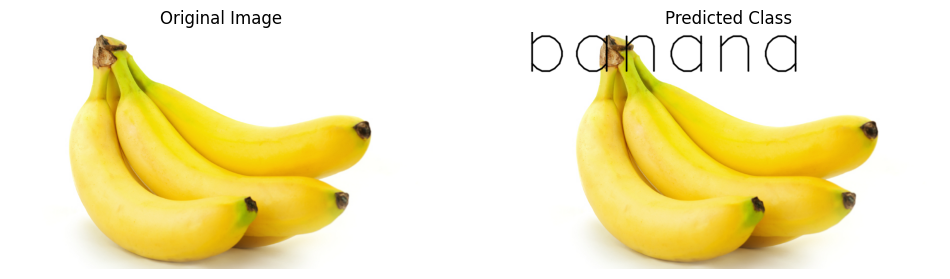

In [7]:
# Define a function to predict the vegetable class from an image
def predict_fruit(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is not None:
        # Extract features from the image
        #features = extract_features(image)
        hog_features = extract_hog_features(image)
        color_hist_features = extract_color_histogram(image)
        lbp_features = extract_lbp_features(image)
        glcm_features = extract_glcm_features(image)
        combined_features = np.concatenate((hog_features, color_hist_features, lbp_features, glcm_features))

        # Predict the class using the trained classifier
        predicted_class = clf.predict([combined_features])

        return predicted_class[0]
    else:
        return "Invalid Image"

#  path to the image to predict
image_to_predict = "validation/banana/Image_4.jpg"
# Loading the original image
original_image = cv2.imread(image_to_predict)

# prediction
predicted_class = predict_fruit(image_to_predict)

# figure with two subplots (original and predicted)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display  original image
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display  image with predicted class label
image_with_label = original_image.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image_with_label, str(predicted_class), (10, 80), font, 5, (0,0,0), 2, cv2.LINE_AA)
axes[1].imshow(cv2.cvtColor(image_with_label, cv2.COLOR_BGR2RGB))
axes[1].set_title('Predicted Class')
axes[1].axis('off')

plt.show()